<a href="https://colab.research.google.com/github/biditdas18/Projects/blob/master/TF2_0_Spam_Detection_CNN(17).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This exercise is an attempt to take the classical spam email detection sytems perform spam email classification using a convolution neural network (CNN). 

In [0]:
# Import necessary frameworks
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input,Dense,GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# This URL doesn't work directly with pd.read_csv
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2020-06-02 20:54:51--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.31.80.48, 104.31.81.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.04s   

2020-06-02 20:54:52 (11.9 MB/s) - ‘spam.csv’ saved [503663/503663]



In [0]:
# load the data on the pandas dataframe by exclusively naming the encoding in the argument
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
# Removing the unnecessary columns
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
# Renaming the remaining columns with an appropiate name
df.columns = ['labels','data']

In [10]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Renaming the label columns as b_labels while at the same time
# converting the entire column to a binary values mapping ham with 0 and spam with 1
df['b_labels'] = df['labels'].map({'ham': 0, 'spam' : 1})

# we get the values from the entire column as a numpy array and assign it to Y
Y = df['b_labels'].values
print('Y:',Y)

Y: [0 0 1 ... 0 0 0]


In [0]:
# We split the entire dataset into train and test data taking the test size as 33%
X_train,X_test,y_train,y_test = train_test_split(df['data'], Y, test_size=0.33)

In [0]:
# We convert the sentences to sequences by using tokenizer and taking maximum vocabulary size to be 20000
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_test)

In [17]:
# We check the total number of unique word to integer mapping in our dataset
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' %V)

Found 7124 unique tokens.


In [19]:
# Padding the sequence to get a N x T matrix
data_train = pad_sequences(sequence_train)
print('Shape of the data train tensor:', data_train.shape)

# sequence length
T = data_train.shape[1]

Shape of the data train tensor: (3733, 121)


In [21]:
data_test = pad_sequences(sequence_test, maxlen=T)
print('Shape of the data test tensor:',data_test.shape)

Shape of the data test tensor: (1839, 121)


In [22]:
data_test

array([[   0,    0,    0, ...,  720,  464,  290],
       [   0,    0,    0, ...,    6,  476,   80],
       [   0,    0,    0, ..., 3175,  216, 3327],
       ...,
       [   0,    0,    0, ..., 1132,    8,  331],
       [   0,    0,    0, ...,    2,   32,   21],
       [   0,    0,    0, ...,  889,  701,  263]], dtype=int32)

In [26]:
# Create the model

# Choose the embedding dimensionality which is a hyperparameter
D = 20

# We have set the size of embedding to be (V+1)xD,
# because the first index starts from 1 and not 0.

i = Input(shape=(T,))
x = Embedding(V+1,D)(i)
x = Conv1D(32,3,activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64,3,activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128,3,activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1,activation='sigmoid')(x)

model = Model(i,x)

model.compile(
    loss = 'binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

r = model.fit(
    data_train,y_train,
    epochs=10,
    validation_data=(data_test,y_test)
)

Epoch 1/10
117/117 [==============================] - 2s 15ms/step - loss: 0.4170 - accuracy: 0.8612 - val_loss: 0.3592 - val_accuracy: 0.8646
Epoch 2/10
117/117 [==============================] - 2s 14ms/step - loss: 0.2812 - accuracy: 0.8770 - val_loss: 0.1777 - val_accuracy: 0.9500
Epoch 3/10
117/117 [==============================] - 2s 14ms/step - loss: 0.0504 - accuracy: 0.9861 - val_loss: 0.1236 - val_accuracy: 0.9744
Epoch 4/10
117/117 [==============================] - 2s 14ms/step - loss: 0.0217 - accuracy: 0.9944 - val_loss: 0.1108 - val_accuracy: 0.9788
Epoch 5/10
117/117 [==============================] - 2s 14ms/step - loss: 0.0147 - accuracy: 0.9960 - val_loss: 0.1323 - val_accuracy: 0.9810
Epoch 6/10
117/117 [==============================] - 2s 14ms/step - loss: 0.0106 - accuracy: 0.9968 - val_loss: 0.1325 - val_accuracy: 0.9782
Epoch 7/10
117/117 [==============================] - 2s 14ms/step - loss: 0.0111 - accuracy: 0.9971 - val_loss: 0.1611 - val_accuracy: 0.9772

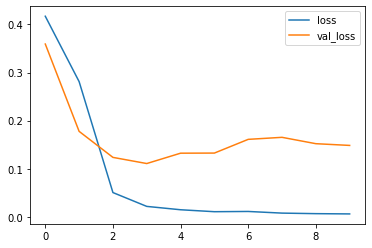

In [27]:
# Plot for loss per iteration
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

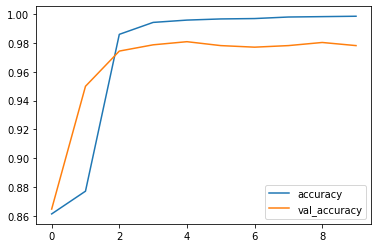

In [28]:
# Plot for accuracy per periteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()